# 2.Data Cleaning and Imputation

Exploring and analyzing data often means dealing with missing values, incorrect data types, and outliers. In this chapter, you’ll learn techniques to handle these issues and streamline your EDA processes!

# Dealing with missing data

It is important to deal with missing data before starting your analysis.

One approach is to drop missing values if they account for a small proportion, typically five percent, of your data.

Working with a dataset on plane ticket prices, stored as a pandas DataFrame called planes, you'll need to count the number of missing values across all columns, calculate five percent of all values, use this threshold to remove observations, and check how many missing values remain in the dataset.

# Instructions:

- Print the number of missing values in each column of the DataFrame.

In [1]:
import pandas as pd
planes = pd.read_csv("planes.csv")
# Count the number of missing values in each column
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


- Calculate how many observations five percent of the planes DataFrame is equal to.

In [2]:
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


- Create cols_to_drop by applying boolean indexing to columns of the DataFrame with missing values less than or equal to the threshold.
- Use this filter to remove missing values and save the updated DataFrame.

In [3]:
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


# Strategies for remaining missing data

The five percent rule has worked nicely for your planes dataset, eliminating missing values from nine out of 11 columns!

Now, you need to decide what to do with the "Additional_Info" and "Price" columns, which are missing 300 and 368 values respectively.

You'll first take a look at what "Additional_Info" contains, then visualize the price of plane tickets by different airlines.

The following imports have been made for you:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Instructions:

- Print the values and frequencies of "Additional_Info".

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Check the values of the Additional_Info column
print(planes['Additional_Info'].value_counts())

No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


- Create a boxplot of "Price" by "Airline".

No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


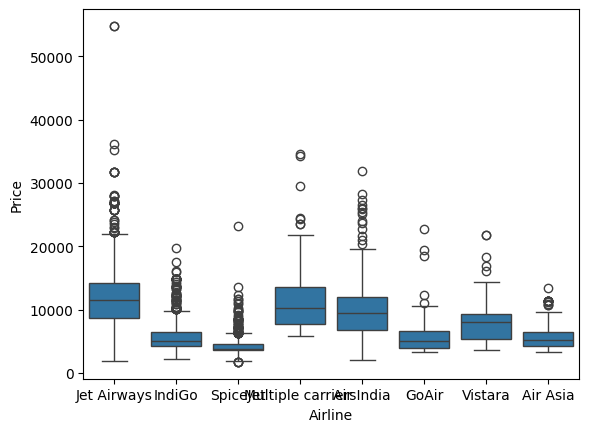

In [6]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

# Create a box plot of Price by Airline
sns.boxplot(data=planes, x='Airline', y='Price')

plt.show()

# Question

How should you deal with the missing values in "Additional_Info" and "Price"?
Possible answers


( ) Remove the "Additional_Info" column and impute the mean for missing values of "Price".

( ) Remove "No info" values from "Additional_Info" and impute the median for missing values of "Price".

( ) Remove the "Additional_Info" column and impute the mean by "Airline" for missing values of "Price".

(x) Remove the "Additional_Info" column and impute the median by "Airline" for missing values of "Price".

# Imputing missing plane prices

Now there's just one column with missing values left!

You've removed the "Additional_Info" column from planes—the last step is to impute the missing data in the "Price" column of the dataset.

As a reminder, you generated this boxplot, which suggested that imputing the median price based on the "Airline" is a solid approach!

Box plot of plane ticket prices by Airline

# Instructions:

- Group planes by airline and calculate the median price.

In [7]:
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


- Convert the grouped median prices to a dictionary.

In [8]:
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

# Convert to a dictionary
prices_dict = airline_prices.to_dict()

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


- Conditionally impute missing values for "Price" by mapping values in the "Airline column" based on prices_dict.
- Check for remaining missing values.

In [9]:
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

# Convert to a dictionary
prices_dict = airline_prices.to_dict()

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isnull().sum())

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price                0
dtype: int64


# Finding the number of unique values

You would like to practice some of the categorical data manipulation and analysis skills that you've just seen. To help identify which data could be reformatted to extract value, you are going to find out which non-numeric columns in the planes dataset have a large number of unique values.

pandas has been imported for you as pd, and the dataset has been stored as planes.

# Instructions:

- Filter planes for columns that are of "object" data type.
- Loop through the columns in the dataset.
- Add the column iterator to the print statement, then call the function to return the number of unique values in the column.

In [10]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

# Loop through columns
for i in non_numeric.columns:
  
  # Print the number of unique values
  print(f'Number of unique values in {i} column: ', non_numeric[i].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5
Number of unique values in Additional_Info column:  9


# Flight duration categories

As you saw, there are 362 unique values in the "Duration" column of planes. Calling planes["Duration"].head(), we see the following values:

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object
Looks like this won't be simple to convert to numbers. However, you could categorize flights by duration and examine the frequency of different flight lengths!

You'll create a "Duration_Category" column in the planes DataFrame. Before you can do this you'll need to create a list of the values you would like to insert into the DataFrame, followed by the existing values that these should be created from.

# Instructions:

- Create a list of categories containing "Short-haul", "Medium", and "Long-haul".

In [11]:
# Create a list of categories
flight_categories = ['Short-haul','Medium','Long-haul']

- Create short_flights, a string to capture values of "0h", "1h", "2h", "3h", or "4h" taking care to avoid values such as "10h".
- Create medium_flights to capture any values between five and nine hours.
- Create long_flights to capture any values from 10 hours to 16 hours inclusive.

In [12]:
# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short_flights
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium_flights
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long_flights
long_flights = "10h|11h|12h|13h|14h|15h|16h"

# Adding duration categories

Now that you've set up the categories and values you want to capture, it's time to build a new column to analyze the frequency of flights by duration!

The variables flight_categories, short_flights, medium_flights, and long_flights that you previously created are available to you.

Additionally, the following packages have been imported: pandas as pd, numpy as np, seaborn as sns, and matplotlib.pyplot as plt.

# Instructions:

- Create conditions, a list containing subsets of planes["Duration"] based on short_flights, medium_flights, and long_flights.
- Create the "Duration_Category" column by calling a function that accepts your conditions list and flight_categories, setting values not found to "Extreme duration".
- Create a plot showing the count of each category.

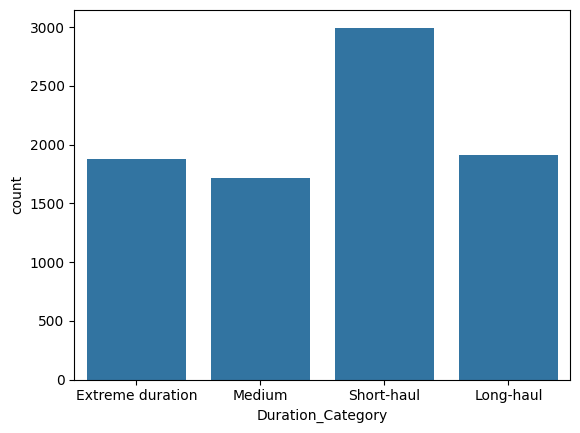

In [14]:
import numpy as np
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

# Flight duration

You would like to analyze the duration of flights, but unfortunately, the "Duration" column in the planes DataFrame currently contains string values.

You'll need to clean the column and convert it to the correct data type for analysis.

# Instructions:

- Print the first five values of the "Duration" column.

In [15]:
# Preview the column
print(planes['Duration'].head())

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


- Remove "h" from the column.

In [16]:
# Preview the column
print(planes["Duration"].head())

# Remove the string character
planes['Duration'] = planes['Duration'].str.replace('h', '')

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


- Convert the column to float data type.

In [17]:
# Preview the column
print(planes["Duration"].head())

# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", "")

# Convert to float data type
planes["Duration"] = planes['Duration'].astype('float')

0        19
1     5 25m
2     4 45m
3     2 25m
4    15 30m
Name: Duration, dtype: object


ValueError: could not convert string to float: '5 25m'

- Plot a histogram of "Duration" values.

In [18]:
# Preview the column
print(planes["Duration"].head())

# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", "")

# Convert to float data type
planes["Duration"] = planes["Duration"].astype(float)

# Plot a histogram
sns.histplot(x='Duration',data=planes)
plt.show()

0        19
1     5 25m
2     4 45m
3     2 25m
4    15 30m
Name: Duration, dtype: object


ValueError: could not convert string to float: '5 25m'